<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Library" data-toc-modified-id="Library-2">Library</a></span></li><li><span><a href="#Kaggle-API" data-toc-modified-id="Kaggle-API-3">Kaggle API</a></span></li><li><span><a href="#Get-the-data" data-toc-modified-id="Get-the-data-4">Get the data</a></span></li><li><span><a href="#Check-the-data" data-toc-modified-id="Check-the-data-5">Check the data</a></span><ul class="toc-item"><li><span><a href="#2.1-application_train" data-toc-modified-id="2.1-application_train-5.1">2.1 application_train</a></span><ul class="toc-item"><li><span><a href="#2.1.1-Check-data-unbalance" data-toc-modified-id="2.1.1-Check-data-unbalance-5.1.1">2.1.1 Check data unbalance</a></span></li></ul></li><li><span><a href="#2.2-POS_CASH_balance" data-toc-modified-id="2.2-POS_CASH_balance-5.2">2.2 POS_CASH_balance</a></span></li><li><span><a href="#2.3-bureau" data-toc-modified-id="2.3-bureau-5.3">2.3 bureau</a></span></li><li><span><a href="#2.4-bureau_balance" data-toc-modified-id="2.4-bureau_balance-5.4">2.4 bureau_balance</a></span></li><li><span><a href="#2.5-credit_card_balance" data-toc-modified-id="2.5-credit_card_balance-5.5">2.5 credit_card_balance</a></span></li><li><span><a href="#2.6-previous_application" data-toc-modified-id="2.6-previous_application-5.6">2.6 previous_application</a></span></li><li><span><a href="#2.7-installments_payments" data-toc-modified-id="2.7-installments_payments-5.7">2.7 installments_payments</a></span></li></ul></li><li><span><a href="#Explore-the-data" data-toc-modified-id="Explore-the-data-6">Explore the data</a></span><ul class="toc-item"><li><span><a href="#Application" data-toc-modified-id="Application-6.1">Application</a></span><ul class="toc-item"><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-6.1.1">Categorical Data</a></span></li><li><span><a href="#Continious-Data" data-toc-modified-id="Continious-Data-6.1.2">Continious Data</a></span></li></ul></li><li><span><a href="#Bureau-data" data-toc-modified-id="Bureau-data-6.2">Bureau data</a></span><ul class="toc-item"><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-6.2.1">Categorical Data</a></span></li><li><span><a href="#Continous-Data" data-toc-modified-id="Continous-Data-6.2.2">Continous Data</a></span></li></ul></li><li><span><a href="#Previous-application-data" data-toc-modified-id="Previous-application-data-6.3">Previous application data</a></span><ul class="toc-item"><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-6.3.1">Categorical Data</a></span></li><li><span><a href="#Continous-Data" data-toc-modified-id="Continous-Data-6.3.2">Continous Data</a></span></li></ul></li></ul></li></ul></div>

# Introduction

# Library

In [1]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values).query('missing_ratio>0').sort_values(['missing_ratio'], ascending=False)

In [2]:
def plot_(data):
    fig, axs = plt.subplots(ncols=3)
    sns.distplot(data["AMT_CREDIT"])
    sns.regplot(x='value', y='wage', data=df_melt, ax=axs[0])
    sns.regplot(x='value', y='wage', data=df_melt, ax=axs[1])
    sns.boxplot(x='education',y='wage', data=df_melt, ax=axs[2])

# Kaggle API

First, install the Kaggle library.

In [4]:
!pip install kaggle

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


To see the competitions, use this line. It will return a list of the competitions on Kaggle.

In [6]:
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
house-prices-advanced-regression-techniques     2030-01-01 00:00:00  Getting Started  Knowledge       5017           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       2703           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      11357            True  
imagenet-object-detection-challenge             2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-detection-from-video-challenge  2029-12-31 07:00:00  Research         Knowledge          0           False  
imagenet-object-localization-challenge          2029-12-31 07:00:00  Research         Knowledge         16           False  


To download the datasets from a competition, use the following code. This will download all of the files from the Titanic competition to the directory “/content/kaggle/”.

In [7]:
!kaggle competitions download  -c home-credit-default-risk -p ~/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip

100%|█████████████████████████████████████████| 117K/117K [00:00<00:00, 578KB/s]

100%|██████████████████████████████████████| 5.58M/5.58M [00:03<00:00, 1.59MB/s]

100%|██████████████████████████████████████| 34.5M/34.5M [00:30<00:00, 1.11MB/s]

100%|█████████████████████████████████████▉| 36.0M/36.1M [00:19<00:00, 1.74MB/s]
100%|██████████████████████████████████████| 36.1M/36.1M [00:19<00:00, 1.94MB/s]
100%|██████████████████████████████████████| 60.8M/60.8M [00:42<00:00, 1.80MB/s]

100%|██████████████████████████████████████| 73.7M/73.7M [01:16<00:00, 1.49MB/s]

100%|██████████████████████████████████████| 94.2M/94.2M [01:25<00:00, 1.27MB/s]

100%|████████████████████████████████████████| 106M/106M [01:37<00:00, 1.52MB/s]

100%|████████████████████████████████████████| 267M/267M [03:04<00:00, 1.63MB/s]

  0%|                                               | 0.00/36.5K [00:00<?, ?B/s]
100%|███████████████████████████████████████| 36.5K/36.5K [00:00<00:00, 995KB/s]


In [8]:
ls -lh ~/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/

total 1387344
-rw-r--r--  1 Ruben  staff    37K 18 jun 19:01 HomeCredit_columns_description.csv
-rw-r--r--  1 Ruben  staff   106M 18 jun 18:58 POS_CASH_balance.csv.zip
-rw-r--r--  1 Ruben  staff   5,6M 18 jun 18:52 application_test.csv.zip
-rw-r--r--  1 Ruben  staff    34M 18 jun 18:53 application_train.csv.zip
-rw-r--r--  1 Ruben  staff    36M 18 jun 18:53 bureau.csv.zip
-rw-r--r--  1 Ruben  staff    61M 18 jun 18:54 bureau_balance.csv.zip
-rw-r--r--  1 Ruben  staff    94M 18 jun 18:56 credit_card_balance.csv.zip
-rw-r--r--  1 Ruben  staff   267M 18 jun 19:01 installments_payments.csv.zip
-rw-r--r--  1 Ruben  staff    74M 18 jun 18:55 previous_application.csv.zip
-rw-r--r--  1 Ruben  staff   117K 18 jun 18:52 sample_submission.csv.zip


In [9]:
!mkdir ~/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data

In [18]:
!unzip ~/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/\*.zip -d ~/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data/

Archive:  /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/application_test.csv.zip
  inflating: /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data/application_test.csv  

Archive:  /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/application_train.csv.zip
  inflating: /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data/application_train.csv  

Archive:  /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/bureau.csv.zip
  inflating: /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data/bureau.csv  

Archive:  /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/bureau_balance.csv.zip
  inflating: /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data/bureau_balance.csv  

Archive:  /Users/Ruben/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data_zip/credit_card_balance.

In [20]:
ls -lh ~/Documents/Desenvolupament/Kaggle/home-credit-default-risk/data/

total 5242648
-rw-rw-r--  1 Ruben  staff   375M 18 mai 00:14 POS_CASH_balance.csv
-rw-rw-r--  1 Ruben  staff    25M 18 mai 00:06 application_test.csv
-rw-rw-r--  1 Ruben  staff   158M 18 mai 00:06 application_train.csv
-rw-rw-r--  1 Ruben  staff   162M 18 mai 00:08 bureau.csv
-rw-rw-r--  1 Ruben  staff   358M 18 mai 00:08 bureau_balance.csv
-rw-rw-r--  1 Ruben  staff   405M 18 mai 00:10 credit_card_balance.csv
-rw-rw-r--  1 Ruben  staff   690M 18 mai 00:13 installments_payments.csv
-rw-rw-r--  1 Ruben  staff   386M 18 mai 00:15 previous_application.csv
-rw-rw-r--  1 Ruben  staff   524K 18 mai 00:06 sample_submission.csv


# Get the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import warnings
import time


%matplotlib inline
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
color = sns.color_palette()



In [4]:
application_train = pd.read_csv('./data/application_train.csv')
bureau = pd.read_csv('./data/bureau.csv')
bureau_balance = pd.read_csv('./data/bureau_balance.csv')
POS_CASH_balance = pd.read_csv('./data/POS_CASH_balance.csv')
credit_card_balance = pd.read_csv('./data/credit_card_balance.csv')
previous_application = pd.read_csv('./data/previous_application.csv')
installments_payments = pd.read_csv('./data/installments_payments.csv')

This file contains descriptions for the columns in the various data files:
![Data description](https://storage.googleapis.com/kaggle-media/competitions/home-credit/home_credit.png)

In [5]:
print('------------main------------')
print('application_train:', application_train.shape[0], "rows and", application_train.shape[1],'columns')
print('      ')
print('------------others------------')
print('POS_CASH_balance:', POS_CASH_balance.shape[0], "rows and", POS_CASH_balance.shape[1],'columns')
print('bureau:', bureau.shape[0], "rows and", bureau.shape[1],'columns')
print('bureau_balance:', bureau_balance.shape[0], "rows and", bureau_balance.shape[1],'columns')
print('previous_application:', previous_application.shape[0], "rows and", previous_application.shape[1],'columns')
print('installments_payments:', installments_payments.shape[0], "rows and", installments_payments.shape[1],'columns')
print('credit_card_balance:', credit_card_balance.shape[0], "rows and", credit_card_balance.shape[1],'columns')

------------main------------
application_train: 307511 rows and 122 columns
      
------------others------------
POS_CASH_balance: 10001358 rows and 8 columns
bureau: 1716428 rows and 17 columns
bureau_balance: 27299925 rows and 3 columns
previous_application: 1670214 rows and 37 columns
installments_payments: 13605401 rows and 8 columns
credit_card_balance: 3840312 rows and 23 columns


# Check the data

En esta sección venermos la estructura de cada fichero, el nombre de las columnas y el numero de nulos del que se compone

## 2.1 application_train

In [7]:
application_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
      

In [9]:
find_missing(application_train).head(20)

,missing_count,missing_ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


### 2.1.1 Check data unbalance
__TARGET__ value 0 means loan is repayed, value 1 means loan is not repayed.


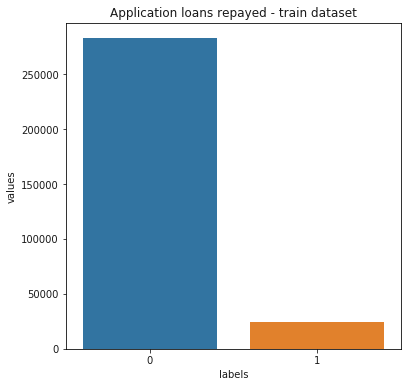

In [4]:
temp = application_train["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                   'values': temp.values
                  })
plt.figure(figsize = (6,6))
plt.title('Application loans repayed - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y="values", data=df)
locs, labels = plt.xticks()
plt.show()

In [6]:
per_ones = len(application_train.loc[application_train['TARGET'] != 0])/len(application_train)

## 2.2 POS_CASH_balance

In [10]:
POS_CASH_balance.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [11]:
POS_CASH_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [12]:
find_missing(POS_CASH_balance).head(20)

,missing_count,missing_ratio
CNT_INSTALMENT_FUTURE,26087,0.002608
CNT_INSTALMENT,26071,0.002607


## 2.3 bureau

In [13]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [14]:
bureau.columns.values

array(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'], dtype=object)

In [15]:
find_missing(bureau).head(12)

,missing_count,missing_ratio
AMT_ANNUITY,1226791,0.714735
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119
DAYS_CREDIT_ENDDATE,105553,0.061496
AMT_CREDIT_SUM,13,0.000008


## 2.4 bureau_balance

In [16]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [17]:
bureau_balance.columns.values

array(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype=object)

In [18]:
find_missing(bureau_balance).head(12)

,missing_count,missing_ratio


## 2.5 credit_card_balance

In [19]:
credit_card_balance.head(5)

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [20]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'], dtype=object)

In [21]:
find_missing(credit_card_balance).head(12)

,missing_count,missing_ratio
AMT_PAYMENT_CURRENT,767988,0.199981
AMT_DRAWINGS_ATM_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_INST_MIN_REGULARITY,305236,0.079482
CNT_INSTALMENT_MATURE_CUM,305236,0.079482


## 2.6 previous_application

In [22]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
previous_application.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT',
       'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT',
       'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'], dtype=object)

In [24]:
find_missing(previous_application).head(20)

,missing_count,missing_ratio
RATE_INTEREST_PRIMARY,1664263,9.964370e-01
RATE_INTEREST_PRIVILEGED,1664263,9.964370e-01
AMT_DOWN_PAYMENT,895844,5.363648e-01
RATE_DOWN_PAYMENT,895844,5.363648e-01
NAME_TYPE_SUITE,820405,4.911975e-01
DAYS_FIRST_DRAWING,673065,4.029813e-01
DAYS_FIRST_DUE,673065,4.029813e-01
DAYS_LAST_DUE_1ST_VERSION,673065,4.029813e-01
DAYS_LAST_DUE,673065,4.029813e-01
DAYS_TERMINATION,673065,4.029813e-01


## 2.7 installments_payments

In [25]:
installments_payments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [26]:
installments_payments.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'], dtype=object)

In [27]:
find_missing(installments_payments).head(15)

,missing_count,missing_ratio
DAYS_ENTRY_PAYMENT,2905,0.000214
AMT_PAYMENT,2905,0.000214


# Explore the data

## Application

* [Home Credit : Complete EDA + Feature Importance](https://www.kaggle.com/codename007/home-credit-complete-eda-feature-importance)
* [Home Credit Default Risk Extensive EDA
](https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda)
* (https://stackoverflow.com/questions/46045750/python-distplot-with-multiple-distributions)
* (http://walkerke.github.io/geog30323/slides/eda-1/#/21)

In [137]:
def plot_stats(df, feature,label_rotation=False,horizontal_layout=True):
    temp = df[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
    # Calculate the percentage of target=1 per category value
    cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.axhline(per_ones, color='green')
    plt.show()

def plot_distribution(var):
    i = 0
    t1 = application_train.loc[application_train['TARGET'] != 0]
    t0 = application_train.loc[application_train['TARGET'] == 0]
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))
    for feature in var: i += 1
    plt.subplot(2,2,i)
    sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
    sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
    plt.ylabel('Density plot', fontsize=12)
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

def plot_stats_categorical(df, var):
    nrow=var.__len__()
    i = 0

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:

        temp = df[feature].value_counts()
        df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})
        # Calculate the percentage of target=1 per category value
        cat_perc = df[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
        cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

        i += 1
        plt.subplot(nrow,2,i)        
        sns.set_color_codes("pastel")
        
        s = sns.barplot(x = feature, y="Number of contracts",data=df1)
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
        s.set_title(feature)
        
        i += 1
        plt.subplot(nrow,2,i)        
        s = sns.barplot(x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
        s.set_xticklabels(s.get_xticklabels(),rotation=45)
        s.set_title(feature)
        
        plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
        plt.tick_params(axis='both', which='major', labelsize=10)        
        plt.axhline(per_ones, color='green')

        
    plt.show();

### Categorical Data

Let's see for categorical data the percent of the loans (by type of the loan) with TARGET value 1 (not returned loan).


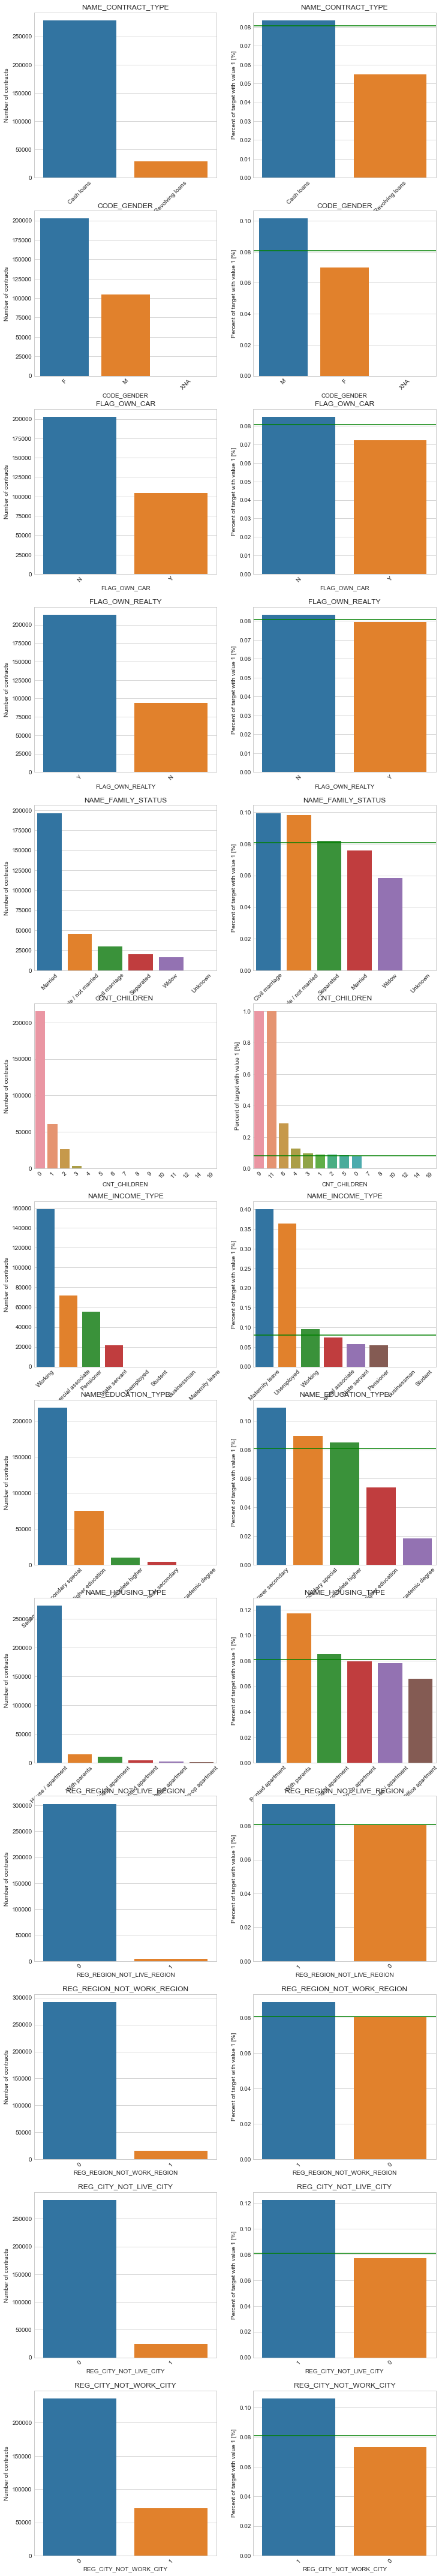

In [128]:
var = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
       'NAME_FAMILY_STATUS', 'CNT_CHILDREN', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY']

plot_stats_categorical(application_train, var)

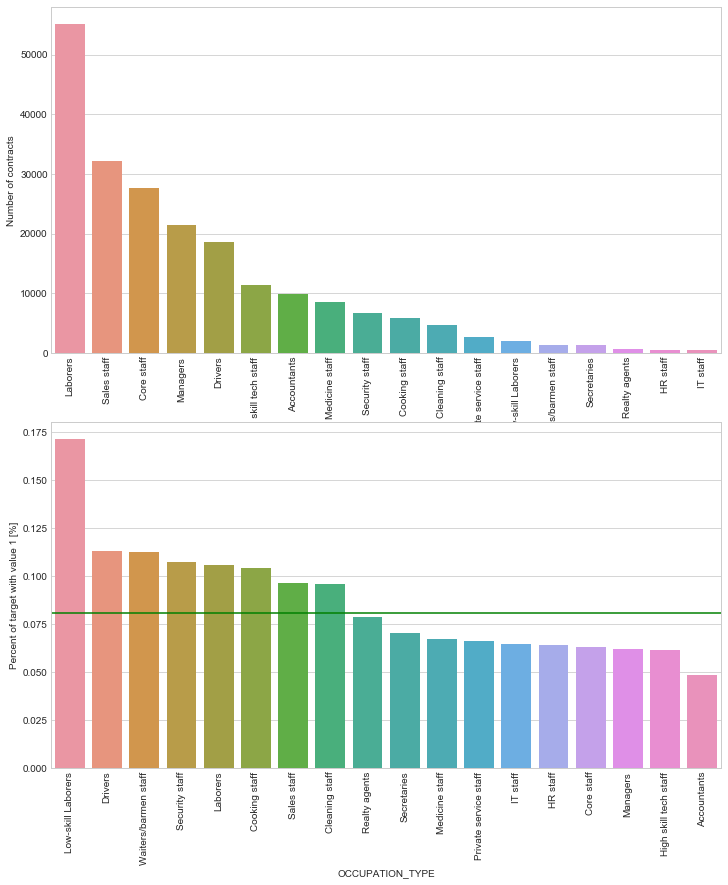

In [138]:
plot_stats(application_train, 'OCCUPATION_TYPE',True, False)

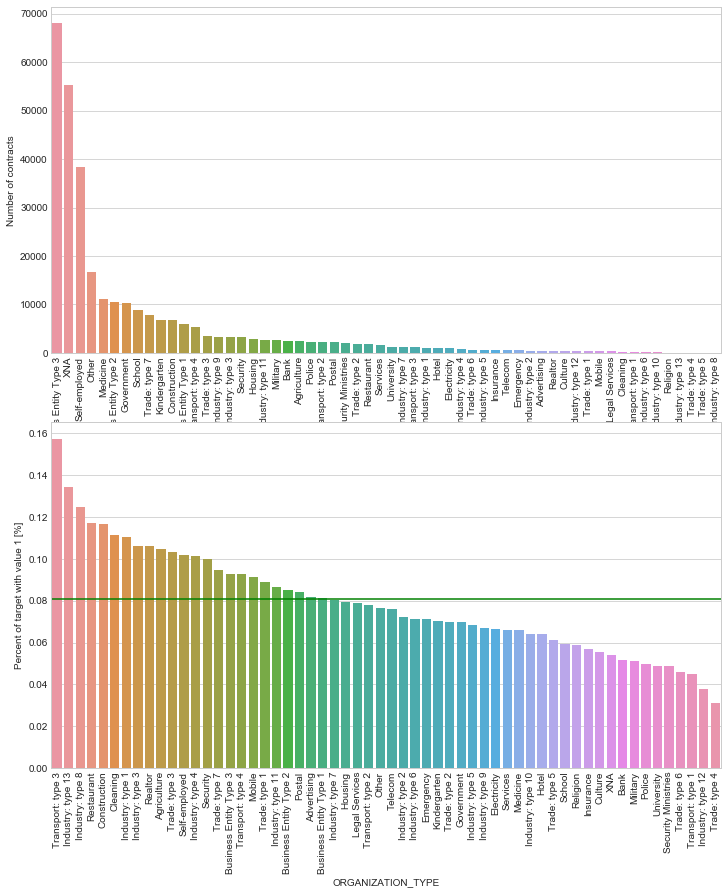

In [139]:
plot_stats(application_train, 'ORGANIZATION_TYPE',True, False)

**Conclusions:**

* Contract type: 
  + Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

* Client gender: 
   + The number of female clients is almost double the number of male clients. 
   + Looking to the percent of defaulted credits, males have a higher chance of not returning their loans (~10%), comparing with women (~7%).

* Flag own car: 
   + The clients that owns a car are almost a half of the ones that doesn't own one. 
   + The clients that owns a car are less likely to not repay a car that the ones that own. Both categories have not-repayment rates around 8%.

* Flag own real estate: 
   + The clients that owns real estate are more than double of the ones that doesn't own. 
   + Both categories (owning real estate or not owning) have not-repayment rates less than 8%.

* Family Status: 
   + Most of clients are married, followed by Single/not married and civil marriage. 
   + In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

* Nº of childrens: 

  + Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare. As for repayment, clients with no children, 1, 2, 3, and 5 children have percents of no repayment around the average (10%). 
  + The clients with 4 and 6 children are above average in terms of percent of not paid back loans (over 25% for families with 6 children). 
  + As for clients with 9 or 11 children, the percent of loans not repaid is 100%.

* Income type of client: 
   + Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.
   
   + The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.
   
* Education type of the client:
   + Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.
   + The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% not-repayment rate.

* Type of the housing of client:
   + Over 250,000 applicants for credits registered their housing as House/apartment. Following categories have a very small number of clients (With parents, Municipal appartment).
   + From these categories, Rented apartment and With parents have higher than 10% not-repayment rate.

* Region registered not live region and not work region: 
   + Very few people are registered in not live or not work region. Generally, the rate of not return is slightly larger for these cases than in the rest (slightly above 8% compared with approx. 8%)

* City registered not live city and not work city:
   + Generally, much more people register in the city they live or work (a larger number register differently in the working city than living city).
   + The ones that register in different city than the working or living city are more frequently not-repaying the loans than the ones that register same city (work 11% or live 12%).
   
* Ocupation type:
   + Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.
   + The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

* Organization type: 
   + Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%).
   


### Continious Data

In [8]:
# Plot distribution of one feature
def plot_distribution(feature,color): 
    plt.figure(figsize=(10,6)) 
    plt.title("Distribution of %s" % feature)
    sns.distplot(application_train[feature].dropna(), color=color, kde=True, bins=100)
    plt.show();

# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    i=0
    t1 = application_train.loc[application_train['TARGET'] != 0] 
    t0 = application_train.loc[application_train['TARGET'] == 0]
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))
    for feature in var: 
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

def plot_distribution_continous(df, var):
    nrow=var.__len__()
    i = 0
    t1 = df.loc[df['TARGET'] != 0] 
    t0 = df.loc[df['TARGET'] == 0]


    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:

        i += 1
        plt.subplot(nrow,2,i)        
        plt.title("Distribution of %s" % feature)
        sns.distplot(df[feature].dropna(), kde=True, bins=100)

        i += 1
        plt.subplot(nrow,2,i)        
        plt.title("Density plot of %s" % feature)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)

        
    plt.show();        
    

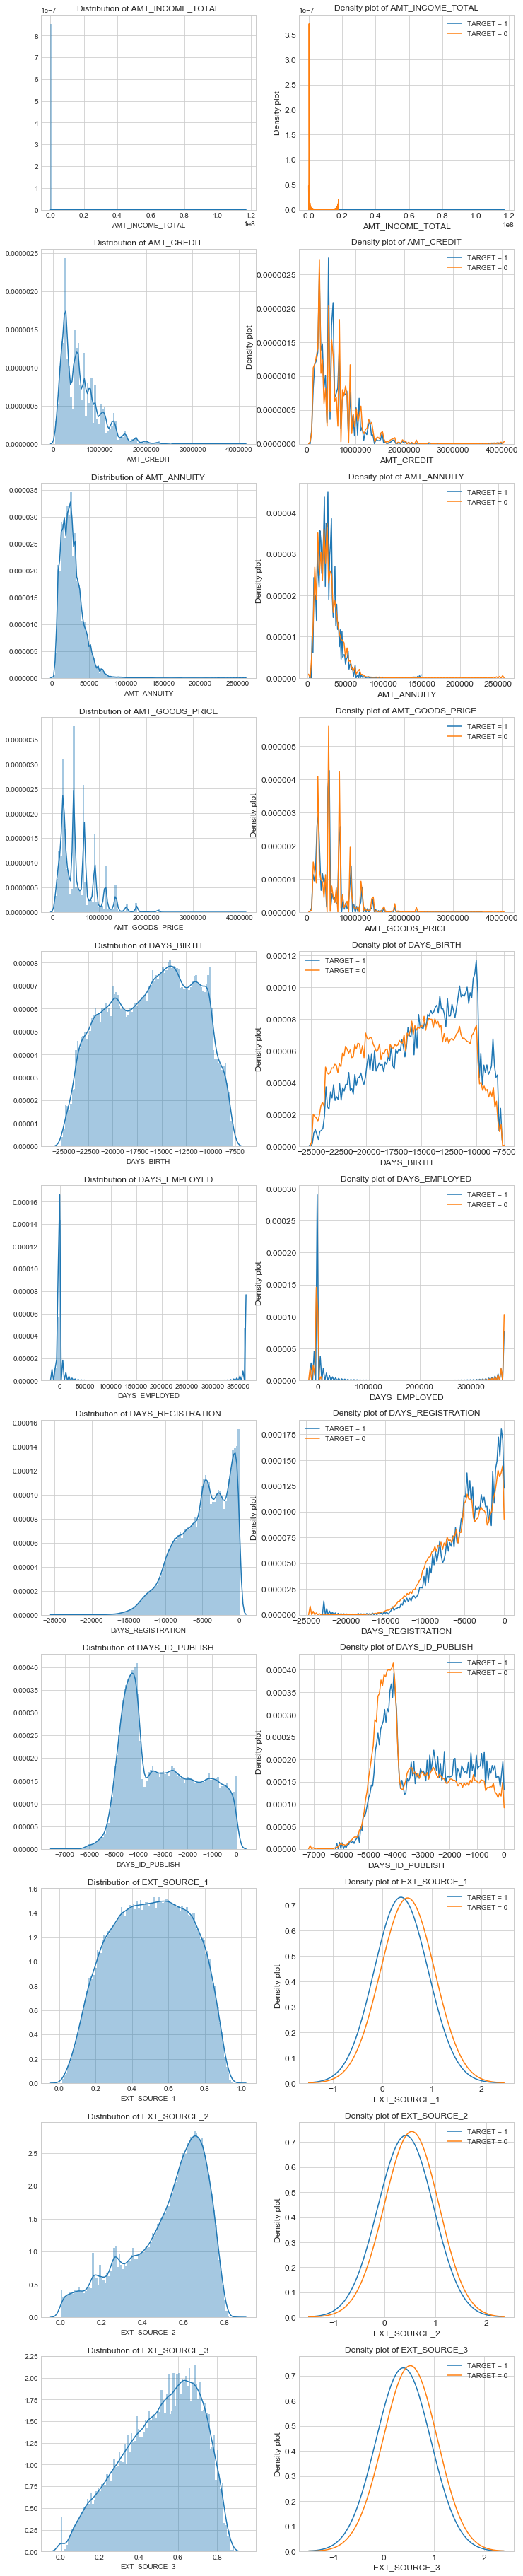

In [132]:
var = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 
       'EXT_SOURCE_2', 'EXT_SOURCE_3']

plot_distribution_continous(application_train, var)

## Bureau data

Bureau data contains all client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in the sample). For every loan in the sample, there are as many rows as number of credits the client had in Credit Bureau before the application date. **SK_ID_CURR** is the key connecting application_train|test data with bureau data.

Let's merge application_train with bureau

In [41]:
application_bureau_train = application_train.merge(bureau, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [42]:
print("The resulting dataframe `application_bureau_train` has ",application_bureau_train.shape[0]," rows and ",
      application_bureau_train.shape[1]," columns.")

The resulting dataframe `application_bureau_train` has  1465325  rows and  138  columns.


### Categorical Data

Let's now analize the application_bureau_train data.

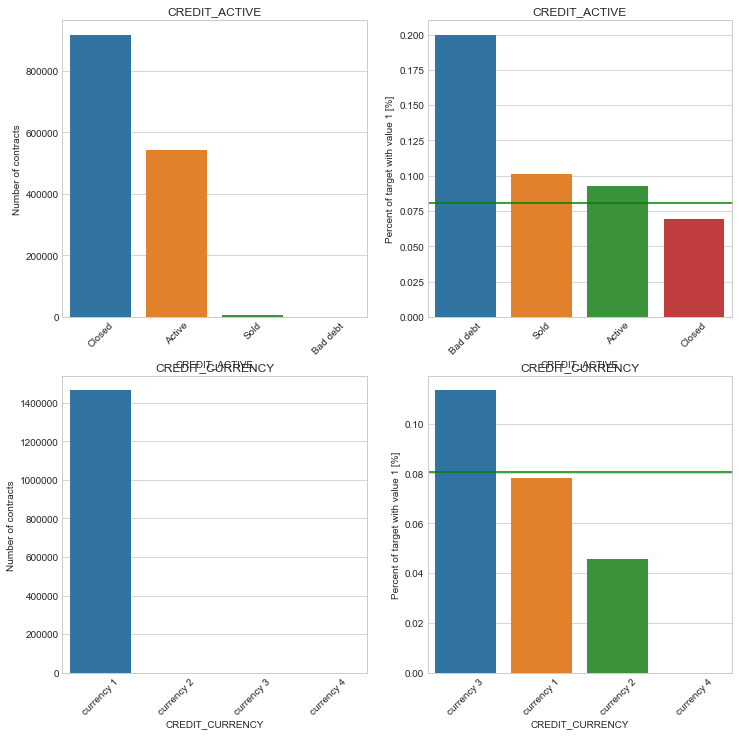

In [146]:
var = ['CREDIT_ACTIVE', 'CREDIT_CURRENCY']

plot_stats_categorical(application_bureau_train, var)

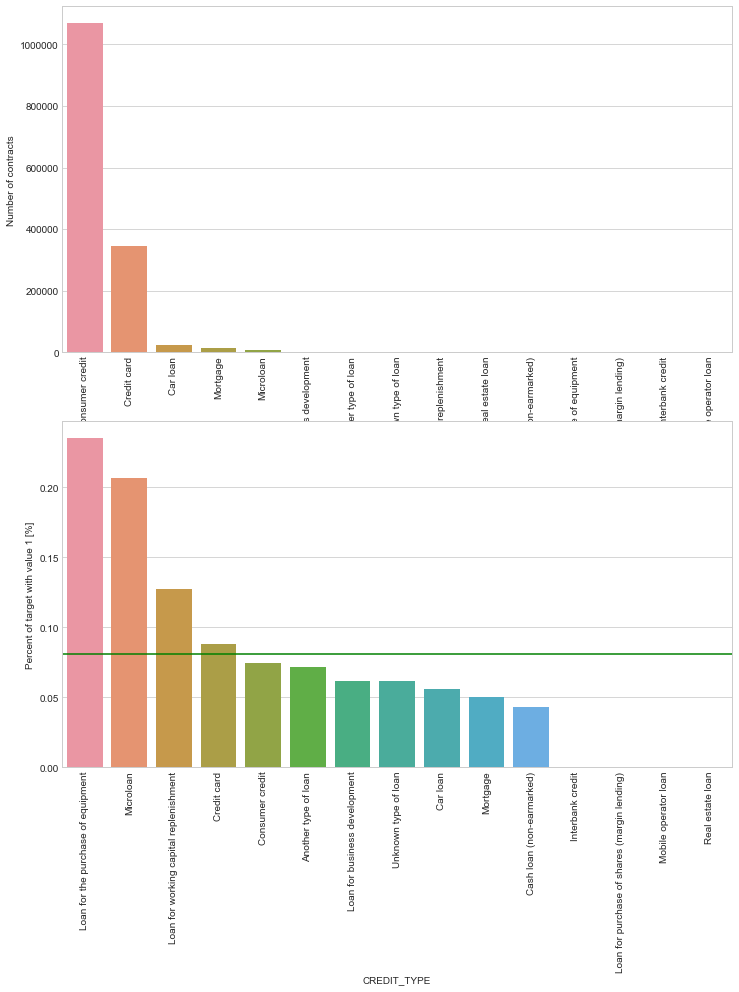

In [147]:
plot_stats(application_bureau_train, 'CREDIT_TYPE', True, False)

**Credit Active**
Most of the credits registered at the Credit Bureau are in the status Closed (~900K). On the second place are the Active credits ( a bit under 600K). Sold and Bad debt are just a few.

In the same time, as percent having TARGET = 1 from total number per category, clients with credits registered to the Credit Bureau with Bad debt have 20% default on the currrent applications.

Clients with credits Sold, Active and Closed have percent of TARGET == 1 (default credit) equal or less than 10% (10% being the rate overall). The smallest rate of default credit have the clients with credits registered at the Credit Bureau with Closed credits.

That means the former registered credit history (as registered at Credit Bureau) is a strong predictor for the dafault credit, since the percent of applications defaulting with a history of Bad debt is twice as large as for Sold or Active and almost three times larger as for Closed.

**Credit Currency**
Credits are mostly in currency_1.

Depending on the currency, the percent of clients defaulting is quite different. Starting with currency_3, then currency_1 and currency_2, the percent of clients defaulting is 11%, 8% and 5%. Percent of defaulting applications for clients that have credits registered with currency_4 is close to 0.

**Credit type**
Majority of historical credits registered at the Credit Bureau are Consumer credit and Credit card. Smaller number of credits are Car loan, Mortgage and Microloan.

Looking now to the types of historical credits registered at the Credit Bureau, there are few types with a high percent of current credit defaults, as following:

* Loan for the purchase of equipment - with over 20% current credits defaults; 
* Microloan - with over 20% current credits defaults;
* Loan for working capital replenishement - with over 12% current credits defaults.


### Continous Data

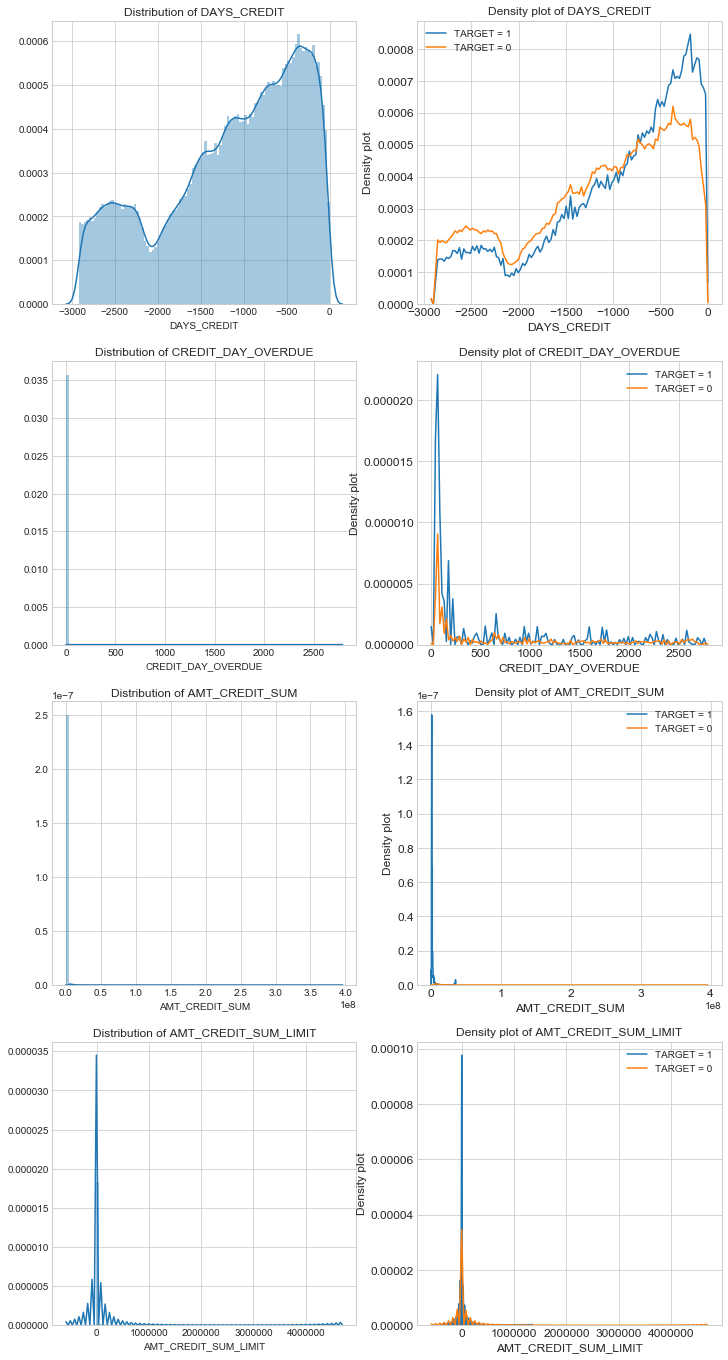

In [134]:
var = ['DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_LIMIT']

plot_distribution_continous(application_bureau_train, var)

**Days Credit** The credit duration (in days) is ranging between less than 3000 days (with a local sadle around 2000 days) and with a increasing frequence for shorter number of days - and with a peak around 300 days (or less than one year).

**CREDIT_DAY_OVERDUE** Most of the credits have 0 or close to 0 days overdue. The maximum number of credit days overdue is ~3000 days.

**AMT_CREDIT_SUM** The distribution of the AMT_CREDIT_SUM shows a concentration of the credits for the lower credit sum range. 

Let's remove the outliers so that we can see better the distribution around 0.

Let's introduce a function to identify and filter the outliers (with a predefined threshold).

Then, let's also modify the function to display a distribution, this time by using the function to filter the outliers.



In [53]:
# Source: https://stackoverflow.com/questions/11882393/matplotlib-disregard-outliers-when-plotting (see references)
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False
    otherwise.
    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.
    Returns:
    --------
        mask : A numobservations-length boolean array.
    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor.
"""
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)
    modified_z_score = 0.6745 * diff / med_abs_deviation
    return modified_z_score > thresh

def plot_b_o_distribution(feature,color): 
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    x = application_bureau_train[feature].dropna() 
    filtered = x[~is_outlier(x)] 
    sns.distplot(filtered,color=color, kde=True,bins=100) 
    plt.show()
 

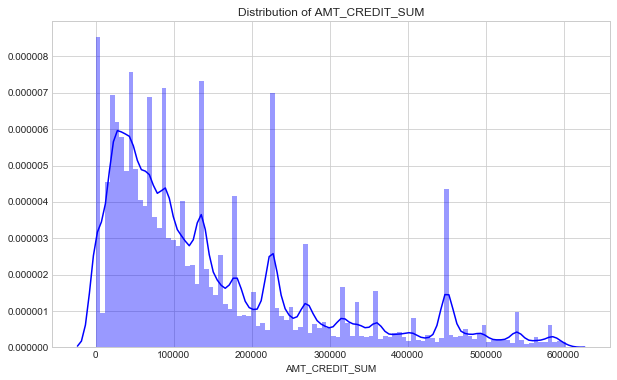

In [54]:
plot_b_o_distribution('AMT_CREDIT_SUM', 'blue')

We can observe that the distribution function shows several peaks and the maximum concentration of the values is around 20,000 but we also see several other peaks at higher values.


## Previous application data

The dataframe previous_application contains information about all previous applications for Home Credit loans of clients who have loans in the sample. There is one row for each previous application related to loans in our data sample. SK_ID_CURR is the key connecting application_train|test data with previous_application data.

Let's merge application_train with previous_application.

In [11]:
application_prev_train = application_train.merge(previous_application, left_on='SK_ID_CURR', right_on='SK_ID_CURR', how='inner')

In [12]:
print("The resulting dataframe `application_prev_train` has ",application_prev_train.shape[0]," rows and ",
      application_prev_train.shape[1]," columns.")

The resulting dataframe `application_prev_train` has  1413701  rows and  158  columns.


### Categorical Data


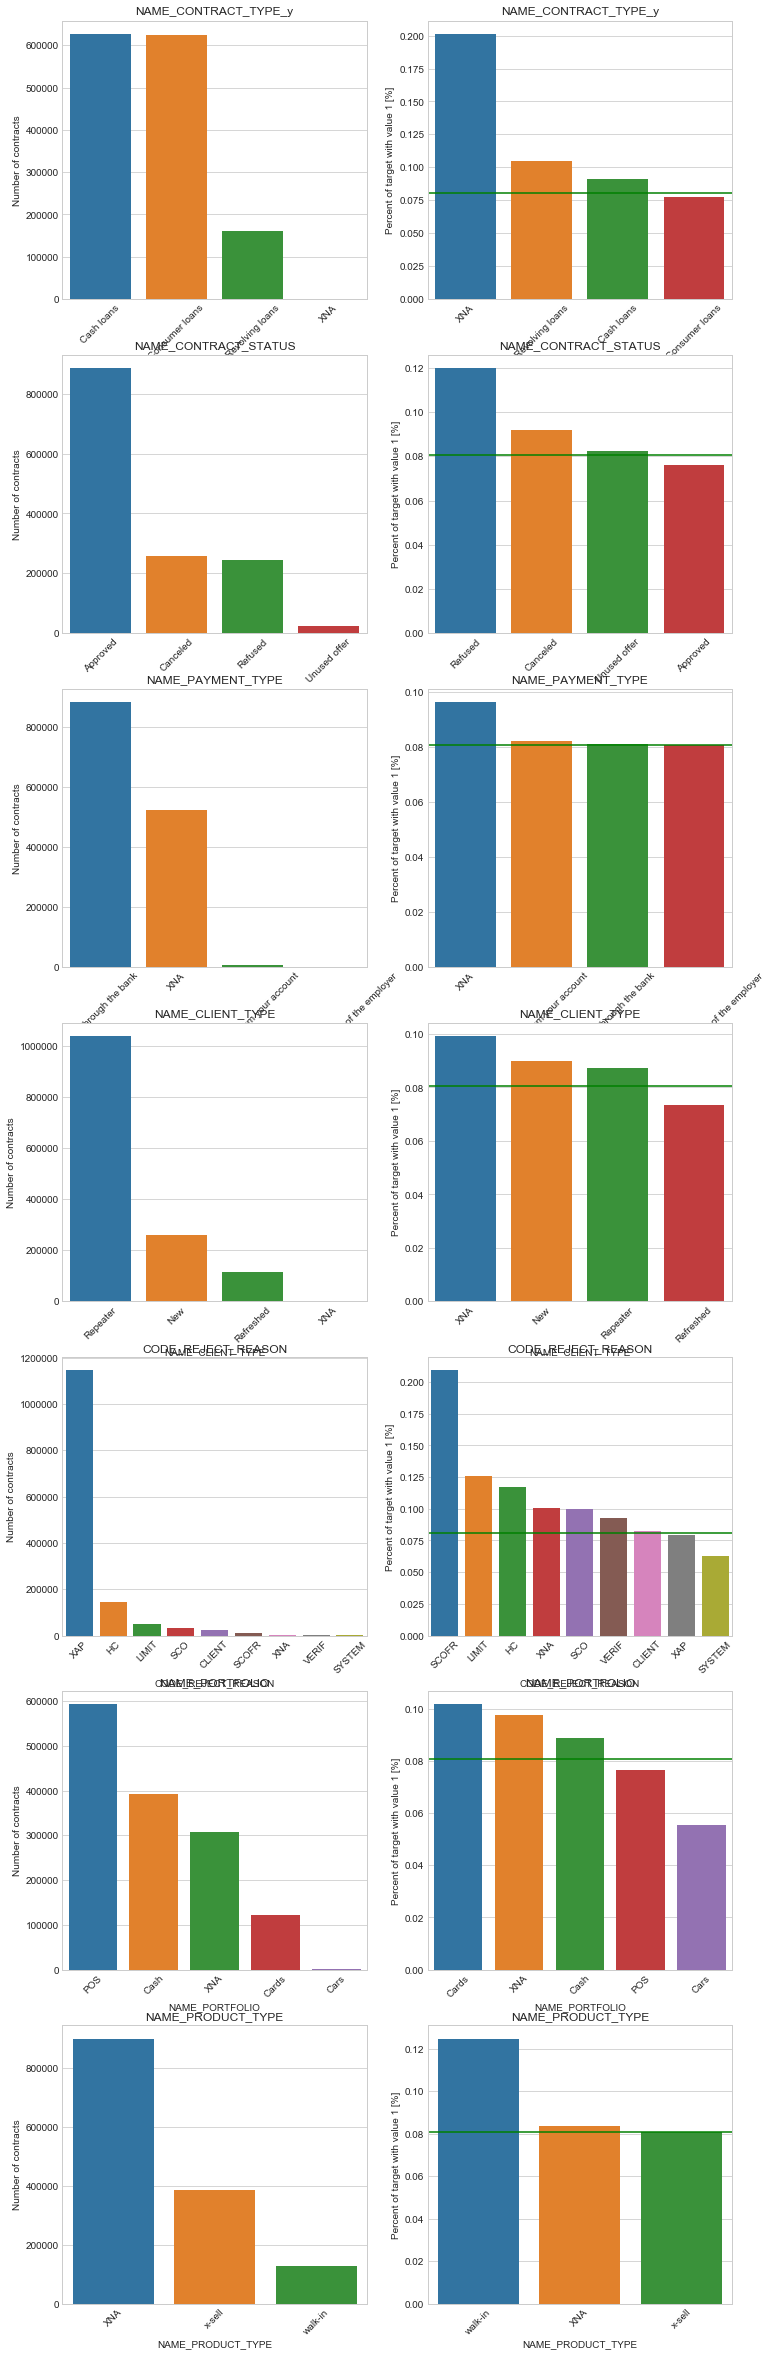

In [141]:
var = ['NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_STATUS', 
       'NAME_PAYMENT_TYPE', 'NAME_CLIENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE']
plot_stats_categorical(application_prev_train, var)

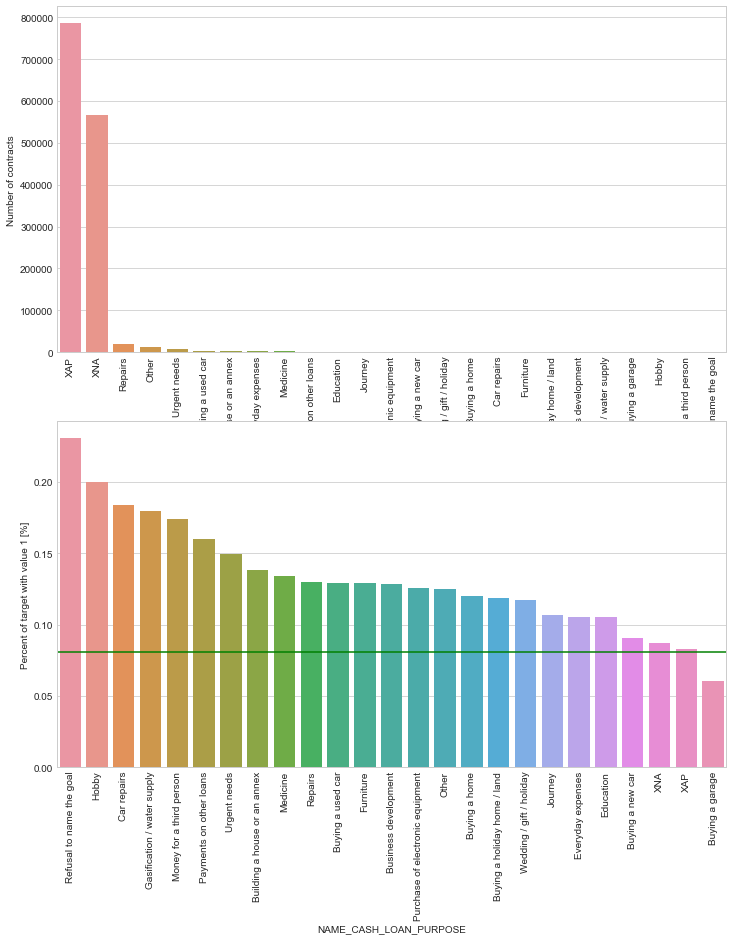

In [142]:
plot_stats(application_prev_train, 'NAME_CASH_LOAN_PURPOSE', True, False)

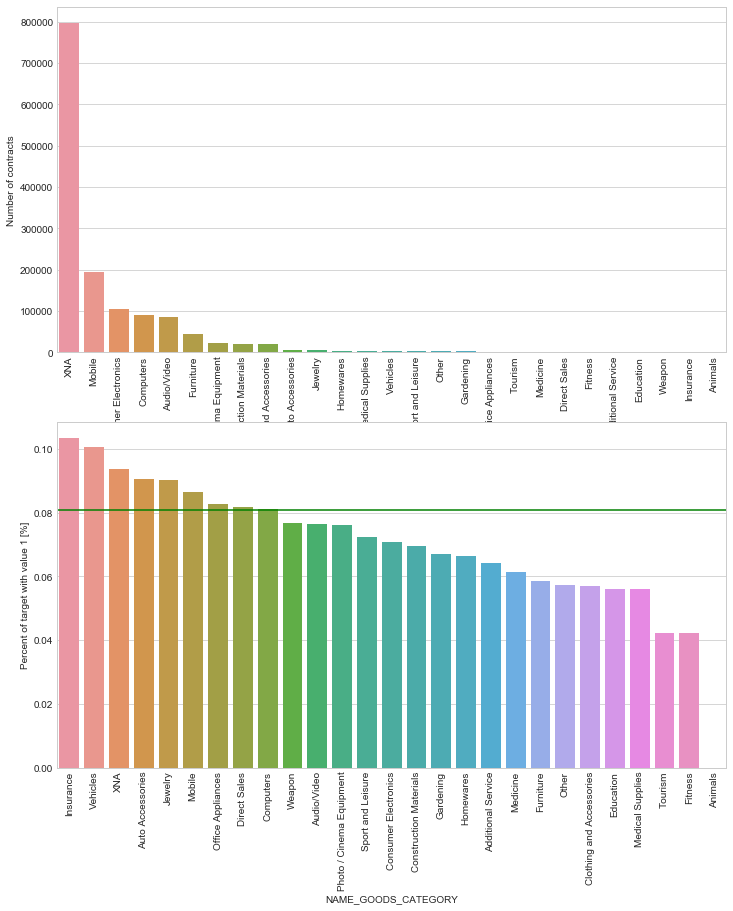

In [143]:
plot_stats(application_prev_train, 'NAME_GOODS_CATEGORY', True, False)

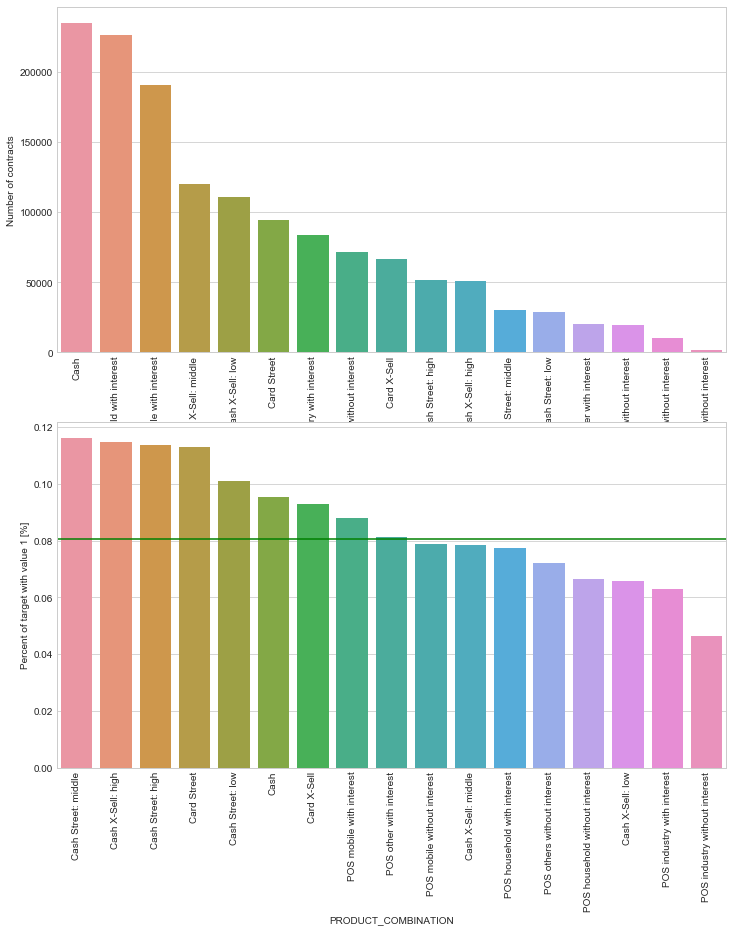

In [144]:
plot_stats(application_prev_train, 'PRODUCT_COMBINATION', True, False)

**NAME_CONTRACT_TYPE_y** There are three types of contract in the previous application data: Cash loans, Consumer loans, Revolving loans. Cash loans and Consumer loans are almost the same number (~600K) whilst Revolving loans are ~150K.

The percent of defauls loans for clients with previous applications is different for the type of previous applications contracts, decreasing from ~10% for Revolving loans, then ~ 9.5% for Cash loans and ~8% for Consumer loans.

**Cash loan porpouse** Besides not identifed/not available categories, Repairs, Other, Urgent needs, Buying a used car, Building a house or an annex accounts for the largest number of contracts.

In terms of percent of defaults for current applications in the sample, clients with history of previous applications have largest percents of defaults when in their history are previous applications for cash loans for Refusal to name the goal - ~23% (which makes a lot of sense), Hobby (20%), Car repairs (~18%).

**Contract Status** Most previous applications contract statuses are Approved (~850K), Canceled and Refused (~240K). There are only ~20K in status Unused offer.

In terms of percent of defaults for current applications in the sample, clients with history of previous applications have largest percents of defaults when in their history contract statuses are Refused (12%), followed by Canceled (9%), Unused offer (~8%) and Approved (lowest percent of defaults in current applictions, with less than 8%).

**Payment type** Most of the previous applications were paid with Cash through the bank (~850K). Payments using Non-cash from your account or Cashless from the account of the employer are much rare. These three types of payments in previous applications results in allmost the same percent of defaults for current clients (~8% each).

**Client type** Most of the previous applications have client type Repeater (~1M), just over 200K are New and ~100K are Refreshed.

In terms of default percent for current applications of clients with history of previous applications, current clients with previous applications have values of percent of defaults ranging from from 8.5%, 8.25% and 7% corresponding to client types in the past New, Repeater and Refreshed, respectivelly.

**Rejection reason**


### Continous Data

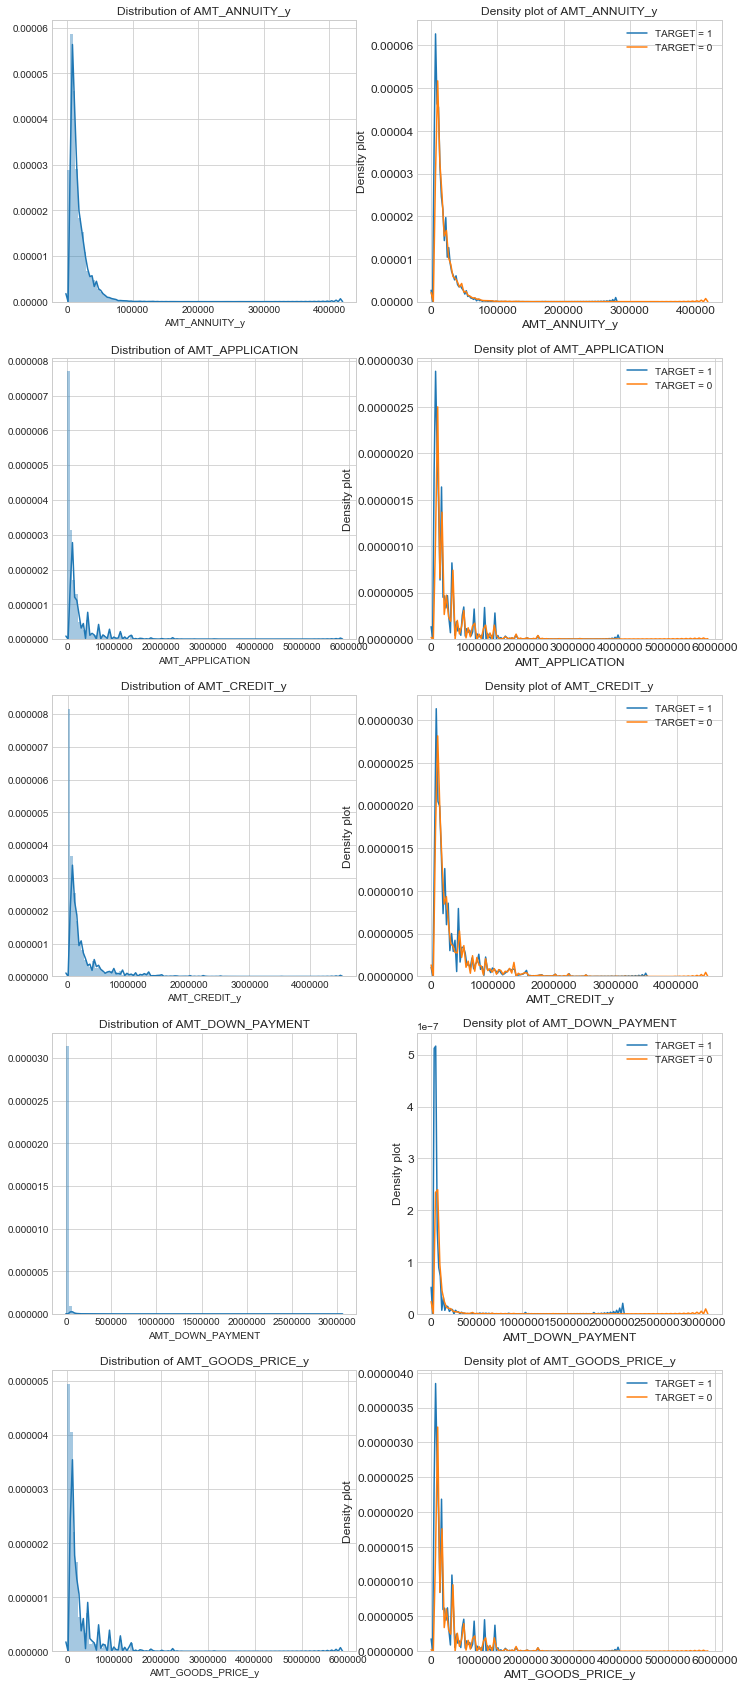

In [16]:
var = ['AMT_ANNUITY_y', 'AMT_APPLICATION', 'AMT_CREDIT_y', 'AMT_DOWN_PAYMENT', 
       'AMT_GOODS_PRICE_y']

plot_distribution_continous(application_prev_train, var)